In [761]:
from arch import arch_model

In [762]:
import matplotlib.pyplot as plt

In [763]:
import numpy as np

In [764]:
import math

In [765]:
import scipy.stats  as stat

In [766]:
# Задание 1  Построить график процесса AR(1)
def AR(n, theta):
    x = np.zeros(n)
    x[0] = np.random.normal(2, 4, 1)[0]  
    for i in range(1,n):
        x[i] = (x[i-1] * theta) + np.random.normal(0, 1, 1)[0] 

    return x


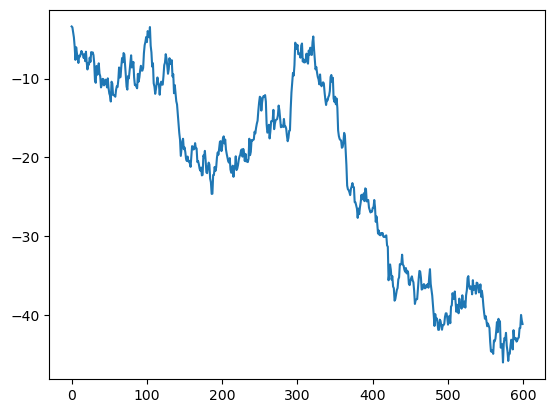

In [840]:
plt.plot(AR(600, 1))

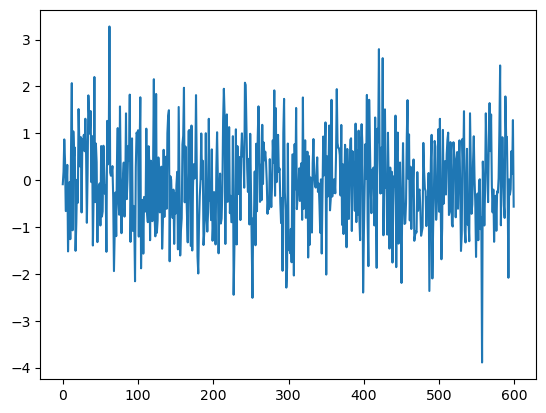

In [768]:
plt.plot(AR(700, 0.1))

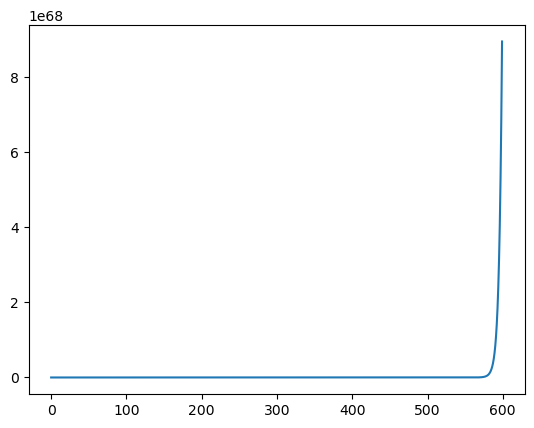

In [862]:
plt.plot(AR(600, 1.3))

In [936]:
# Задание 2. Оценить параметр|theta|≤1 по методу наименьших квадратов (МНК). theta = sum(x_i*x_(i-1))/sum(x_(i-1))^2
def fitMNK(x):
    sum_x1 = 0
    sum_x2 = 0
    for i in range(1,len(x)):
        sum_x1 = sum_x1 + (x[i]*x[i-1])
        sum_x2 = sum_x2 + (x[i-1] ** 2)
    return sum_x1/sum_x2

In [938]:
fitMNK(AR(600,1))

0.9982229717289183

In [940]:
fitMNK(AR(600,0.3))

0.30735649850225466

In [785]:
# Задание 3. Найти оценку максимального правдоподобия (МП) параметра процесса AR(1)

In [942]:

def fitMP(x, sigma):
    sum_x1 = 0
    sum_x2 = 0
    for i in range(1,len(x)):
        sum_x1 = sum_x1 + x[i]*x[i-1]/(sigma**2)
        sum_x2 = sum_x2 + (x[i-1] ** 2)/(sigma**2)
    #return (1/(math.sqrt(2 * math.pi * sigma)))*math.exp(-sum_x1/(2*sum_x2*(sigma**2)))
    return sum_x1/sum_x2 # после логарифмирования и производной получаем ту же формулу что и в МНК только с делением числителя и знаменателя на sigma^2 

In [944]:
fitMP(AR(600,1), 1)

0.9983285307710109

In [948]:
fitMP(AR(600,0.3), 1)

0.27674297487118743

In [793]:
# Задание 4. Рассчитать МНК-оценки для объема выборки k 10 11 ...

In [950]:
def plotMNK(x):
    result = np.zeros(len(x)-10)
    for i in range(10, len(x)):
        x_new = x[:i+1]
        result[i-10] = fitMNK(x_new)
    return result

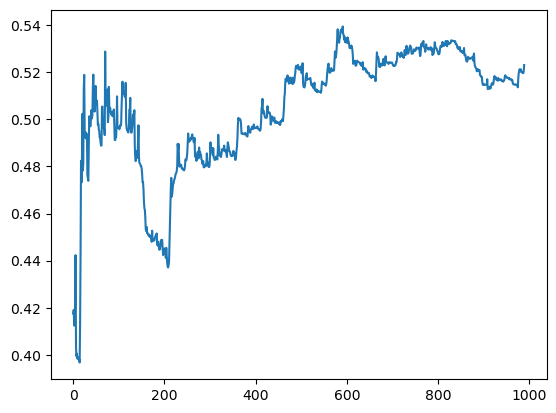

In [952]:
plt.plot(plotMNK(AR(1000, 0.5)))

In [954]:
# Задание 5. Построить график устойчивого процесса AR(2), из n наблюдений. 

In [956]:
def AR2(n, theta):
    x = np.zeros(n+1)
    x[0] = np.random.normal(2, 4, 1)[0]
    x[1] = np.random.normal(2, 4, 1)[0]
    for i in range(2,n+1):
        x[i] = (x[i-1] * theta[0] + x[i-2] * theta[1]) + np.random.normal(0, 1, 1)[0] 
    return x[1:n+1]

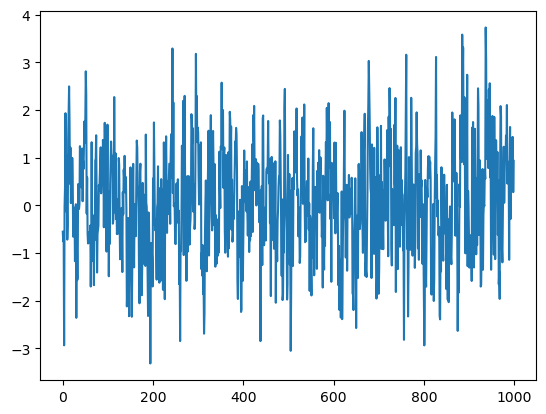

In [958]:
plt.plot(AR2(1000, [0.4,0.1]))

In [960]:
# Задание 6. Вычислить значение параметра AR(2), используя функцию arima пакета stats.

In [962]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima.model import ARIMA

In [994]:
model = ARIMA(AR2(1000, [0.4,0.1]), order=(2,0,0), trend = 'n') # trend = 'n' Это подгонит модель без интерсепта
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1426.253
Date:                Sat, 09 Nov 2024   AIC                           2858.506
Time:                        22:49:13   BIC                           2873.229
Sample:                             0   HQIC                          2864.101
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3553      0.031     11.475      0.000       0.295       0.416
ar.L2          0.1358      0.031      4.369      0.000       0.075       0.197
sigma2         1.0145      0.045     22.681      0.0